In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('cirrhosis.csv')

In [ ]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,2
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,2
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,2
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,2
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,2


In [ ]:
data['Status'] = preprocessing.LabelEncoder().fit_transform(data['Status'])
data['Drug'] = preprocessing.LabelEncoder().fit_transform(data['Drug'])
data['Sex'] = preprocessing.LabelEncoder().fit_transform(data['Sex'])
data['Ascites'] = preprocessing.LabelEncoder().fit_transform(data['Ascites'])
data['Hepatomegaly'] = preprocessing.LabelEncoder().fit_transform(data['Hepatomegaly'])
data['Spiders'] = preprocessing.LabelEncoder().fit_transform(data['Spiders'])
data['Edema'] = preprocessing.LabelEncoder().fit_transform(data['Edema'])

In [ ]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,21464,0,1,1,1,2,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,2
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,2
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176,3.48,210,516.0,96.10,55,151,12.0,2
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,2
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279,3.53,143,671.0,113.15,72,136,10.9,2


In [ ]:
x = data.drop(columns = ['Stage'])
y = data['Stage']

In [ ]:
x.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,1,400,2,0,21464,0,1,1,1,2,14.5,261,2.60,156,1718.0,137.95,172,190,12.2
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176,3.48,210,516.0,96.10,55,151,12.0
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244,2.54,64,6121.8,60.63,92,183,10.3
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279,3.53,143,671.0,113.15,72,136,10.9


In [ ]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Stage, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# SVC
from sklearn.svm import SVC
svm = SVC()
svm_fit = svm.fit(x_train, y_train)
svm_prediction = svm_fit.predict(x_test)
accuracy = accuracy_score(y_test, svm_prediction)

# confusion matrix
confusion_mat = confusion_matrix(y_test, svm_prediction)

# Classification
class_report = classification_report(y_test, svm_prediction)

# printing
print('Confusion Matrix: \n',confusion_mat)
print('Classification Report:\n',class_report)

Confusion Matrix: 
 [[ 0 13]
 [ 0 50]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.79      1.00      0.88        50

    accuracy                           0.79        63
   macro avg       0.40      0.50      0.44        63
weighted avg       0.63      0.79      0.70        63



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# NB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_fit = nb.fit(x_train, y_train)
nb_prediction = nb_fit.predict(x_test)
accuracy = accuracy_score(y_test, nb_prediction)

# confusion matrix
confusion_mat = confusion_matrix(y_test, nb_prediction)

# Classification
class_report = classification_report(y_test, nb_prediction)

# printing
print('Confusion Matrix: \n',confusion_mat)
print('Classification Report:\n',class_report)

Confusion Matrix: 
 [[11  2]
 [24 26]]
Classification Report:
               precision    recall  f1-score   support

           1       0.31      0.85      0.46        13
           2       0.93      0.52      0.67        50

    accuracy                           0.59        63
   macro avg       0.62      0.68      0.56        63
weighted avg       0.80      0.59      0.62        63



In [ ]:
# DTC
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC_fit = DTC.fit(x_train, y_train)
DTC_prediction = DTC_fit.predict(x_test)
accuracy = accuracy_score(y_test, DTC_prediction)

# confusion matrix
confusion_mat = confusion_matrix(y_test, DTC_prediction)

# Classification
class_report = classification_report(y_test, DTC_prediction)

# printing
print('Confusion Matrix: \n',confusion_mat)
print('Classification Report:\n',class_report)

Confusion Matrix: 
 [[ 6  7]
 [ 8 42]]
Classification Report:
               precision    recall  f1-score   support

           1       0.43      0.46      0.44        13
           2       0.86      0.84      0.85        50

    accuracy                           0.76        63
   macro avg       0.64      0.65      0.65        63
weighted avg       0.77      0.76      0.77        63



In [ ]:
# LR
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_fit = lr.fit(x_train, y_train)
lr_prediction = lr_fit.predict(x_test)
accuracy = accuracy_score(y_test, lr_prediction)

# confusion matrix
confusion_mat = confusion_matrix(y_test, lr_prediction)

# Classification
class_report = classification_report(y_test, lr_prediction)

# printing
print('Confusion Matrix: \n',confusion_mat)
print('Classification Report:\n',class_report)

Confusion Matrix: 
 [[ 4  9]
 [ 7 43]]
Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.31      0.33        13
           2       0.83      0.86      0.84        50

    accuracy                           0.75        63
   macro avg       0.60      0.58      0.59        63
weighted avg       0.73      0.75      0.74        63



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN_fit = KNN.fit(x_train, y_train)
KNN_prediction = KNN_fit.predict(x_test)
accuracy = accuracy_score(y_test, KNN_prediction)

# confusion matrix
confusion_mat = confusion_matrix(y_test, KNN_prediction)

# Classification
class_report = classification_report(y_test, KNN_prediction)

# printing
print('Confusion Matrix: \n',confusion_mat)
print('Classification Report:\n',class_report)

Confusion Matrix: 
 [[ 2 11]
 [10 40]]
Classification Report:
               precision    recall  f1-score   support

           1       0.17      0.15      0.16        13
           2       0.78      0.80      0.79        50

    accuracy                           0.67        63
   macro avg       0.48      0.48      0.48        63
weighted avg       0.66      0.67      0.66        63



<Axes: >

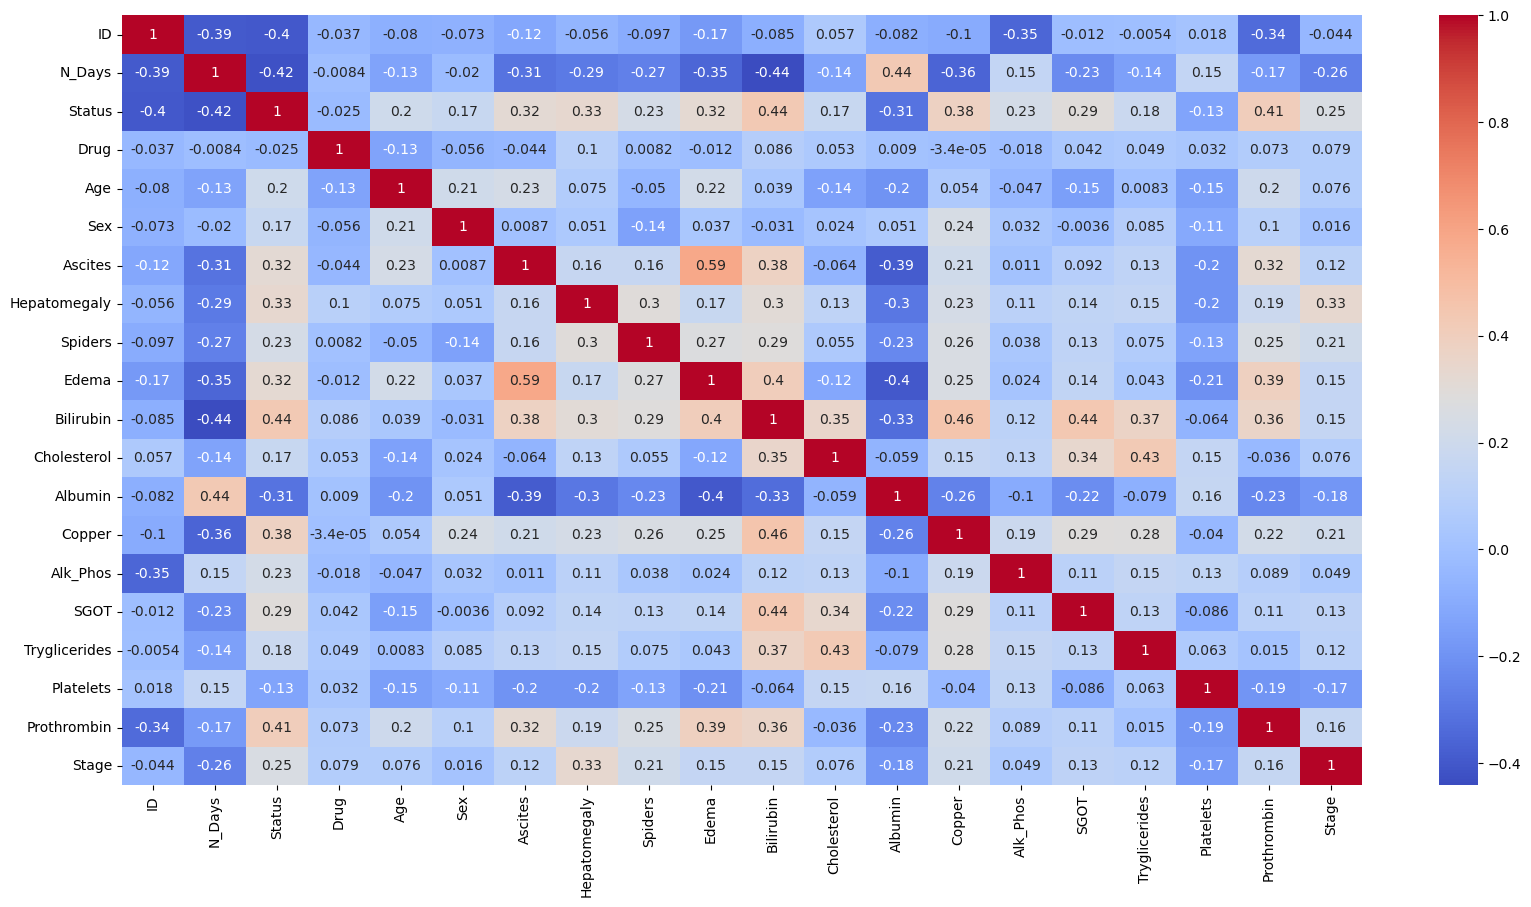

In [ ]:
# Heat map
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(20,10))
sb.heatmap(data.corr(), annot=True, cmap="coolwarm")